# Q 13

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math
import random as rn

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import *
from sklearn import datasets, linear_model
from patsy import dmatrices

In [2]:
rn.seed(1)
#Part a
x = np.random.normal(0,1,100)
#part b
eps = np.random.normal(0,0.25,100)
#part c
y = -1 + 0.5*x + eps
print(len(y))

100


Here, as we see, B0 must be the constant term and B1 the slope hence, B0 = -1 and B1 = 0.5

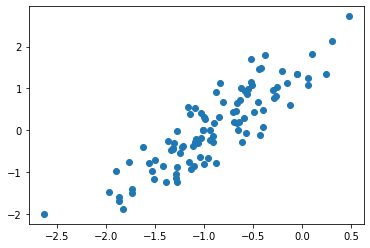

In [3]:
#part d
plt.scatter(y,x)

We observe that x and y share an almost linear relationship

In [4]:
#part e
y, x = dmatrices('y~x')
lm = sm.OLS(y,sm.add_constant(x))
res = lm.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     340.6
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.17e-33
Time:                        15:36:26   Log-Likelihood:                -7.8264
No. Observations:                 100   AIC:                             19.65
Df Residuals:                      98   BIC:                             24.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9369      0.027    -35.315      0.0

The model is a good approximation of our true relationship and B0cap and B1cap are quite close to B0 and B1 as well.

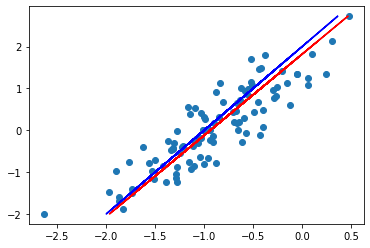

In [5]:
# part f
x_plot = np.delete(x,0,1)
# least squares line
y_pred = res.predict(x)
# population regression line
y_pop = -1 + 0.5*x_plot
plt.scatter(y, x_plot)
plt.plot(y_pred, x_plot, color='red')
plt.plot(y_pop, x_plot, color='blue')


In [6]:
# part g
x_quad = np.column_stack((x, x_plot**2))
qm = sm.OLS(y, x_quad)
resq = qm.fit()
print(resq.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     171.4
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.46e-32
Time:                        15:36:26   Log-Likelihood:                -7.1793
No. Observations:                 100   AIC:                             20.36
Df Residuals:                      97   BIC:                             28.17
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9139      0.033    -27.292      0.0

We see that the addition of a quadratic term (**x2**) although slightly improves our R-squared, its p-value is quite high, which suggests that inclusion of x2 is causing overfitting in our model and hence not improving it eventually leading to poor performance with test data.

### Less noise repetition of the above process (part h)

In [7]:
x2 = np.random.normal(0,1,100)
eps2 = np.random.normal(0,0.15,100)
y2 = -1 + 0.5*x2 + eps2
print(len(y2))

100


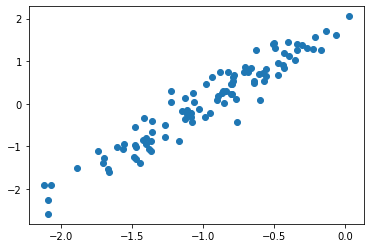

In [8]:
plt.scatter(y2, x2)

We see that as we decrease the variance, our data is now more closely fitting as a linear approximation with less exceptions.

In [9]:
y2, x2 = dmatrices('y2~x2')
lm2 = sm.OLS(y2,sm.add_constant(x2))
res2 = lm2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                     y2   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     1076.
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.21e-54
Time:                        15:36:27   Log-Likelihood:                 53.205
No. Observations:                 100   AIC:                            -102.4
Df Residuals:                      98   BIC:                            -97.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9942      0.014    -69.153      0.0

Our model now has a significantly better R-squared value and the coefficients B0cap and B1cap are more accurate to B0 and B1 respectively.

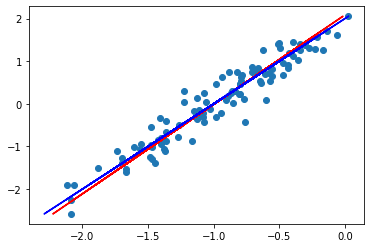

In [10]:
x2_plot = np.delete(x2,0,1)
y2_pred = res2.predict(x2)
y2_pop = -1 + 0.5*x2_plot
plt.scatter(y2, x2_plot)
plt.plot(y2_pred, x2_plot, color='red')
plt.plot(y2_pop, x2_plot, color='blue')

### More noise repetition of the above process (part i)

In [11]:
x3 = np.random.normal(0,1,100)
eps3 = np.random.normal(0,0.35,100)
y3 = -1 + 0.5*x3 + eps3
print(len(y3))

100


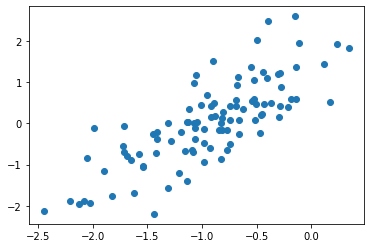

In [12]:
plt.scatter(y3, x3)

We see that as we increase the variance i.e. noise in the data, the plot is more scattered, where finding a linear relationship to generalise it might come with a lot of penalty

In [13]:
y3, x3 = dmatrices('y3~x3')
lm3 = sm.OLS(y3,sm.add_constant(x3))
res3 = lm3.fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                     y3   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     161.6
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.88e-22
Time:                        15:36:27   Log-Likelihood:                -38.660
No. Observations:                 100   AIC:                             81.32
Df Residuals:                      98   BIC:                             86.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9493      0.036    -26.372      0.0

Note that the R-squared value has dropped significantly, denoting how the linear model is not able to fit the data as good as it did previosuly.

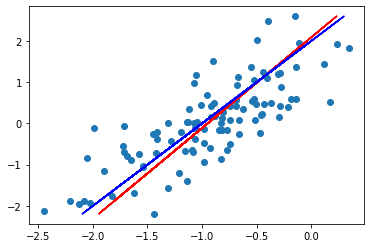

In [14]:
x3_plot = np.delete(x3,0,1)
y3_pred = res3.predict(x3)
y3_pop = -1 + 0.5*x3_plot
plt.scatter(y3, x3_plot)
plt.plot(y3_pred, x3_plot, color='red')
plt.plot(y3_pop, x3_plot, color='blue')

In [15]:
res.conf_int()


array([[-0.98957921, -0.88428037],
       [ 0.45963574,  0.57039833]])

In [16]:
res2.conf_int()


array([[-1.02275064, -0.96568891],
       [ 0.44757411,  0.50521771]])

In [17]:
res3.conf_int()

array([[-1.02069084, -0.87783066],
       [ 0.38362012,  0.52553957]])

Evidently, we can see that the data with lesser noise has a shorter and closer confidence interval than original data and th reverse is true for the data with more noise